In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [53]:
path = 'vgsales.csv'
df = pd.read_csv(path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [55]:
df.shape

(16598, 11)

In [56]:
df.shape[0]

16598

In [57]:
df.shape[1]

11

In [58]:
df.columns.values.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [59]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [60]:
df.isnull().any().any()

True

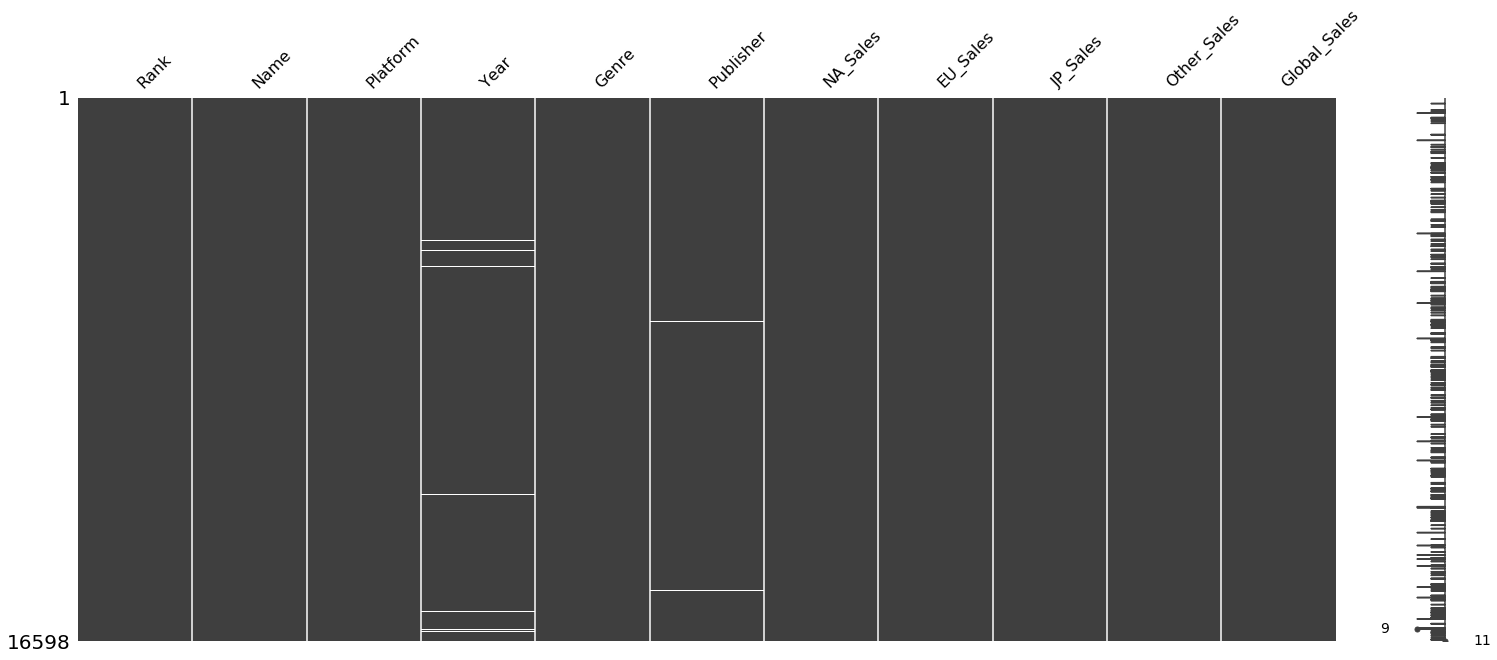

In [61]:
msno.matrix(df)


In [62]:
df.replace({' ': np.nan}, inplace=True)

In [63]:
df.isnull().any().any()

True

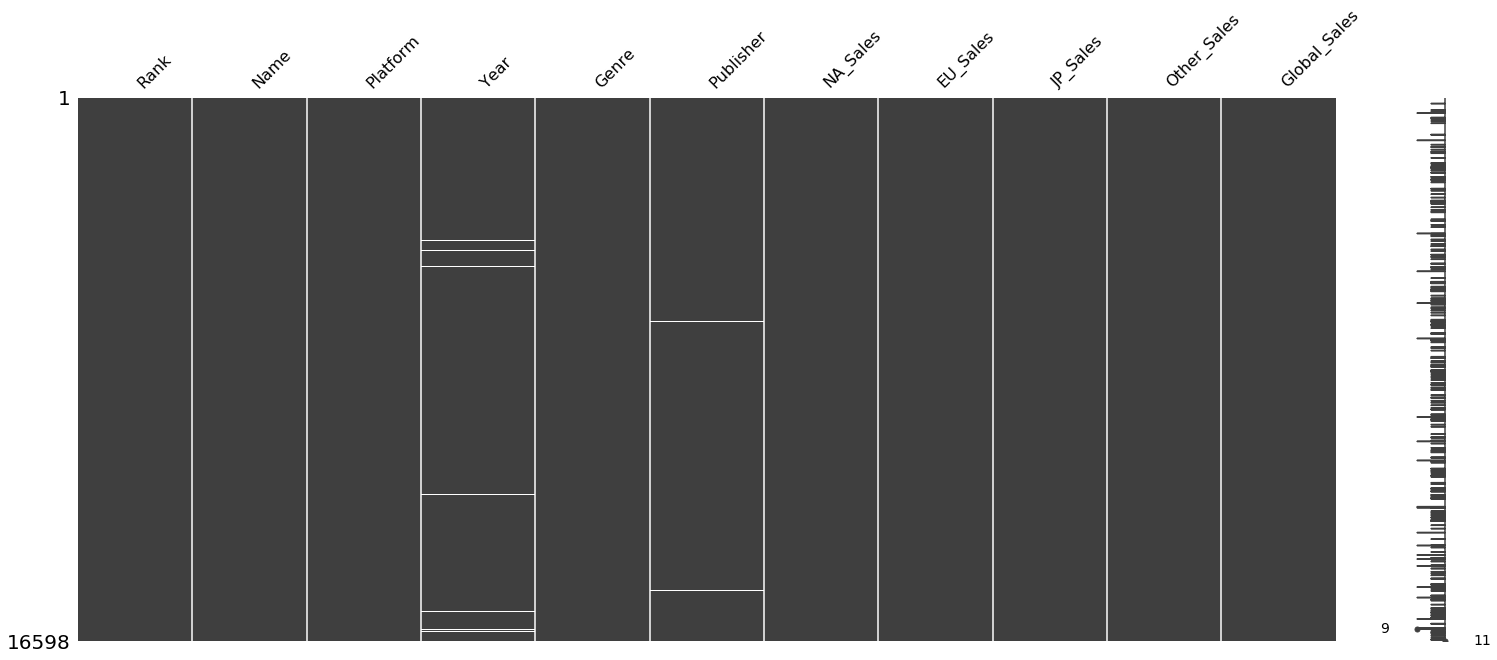

In [64]:
msno.matrix(df)

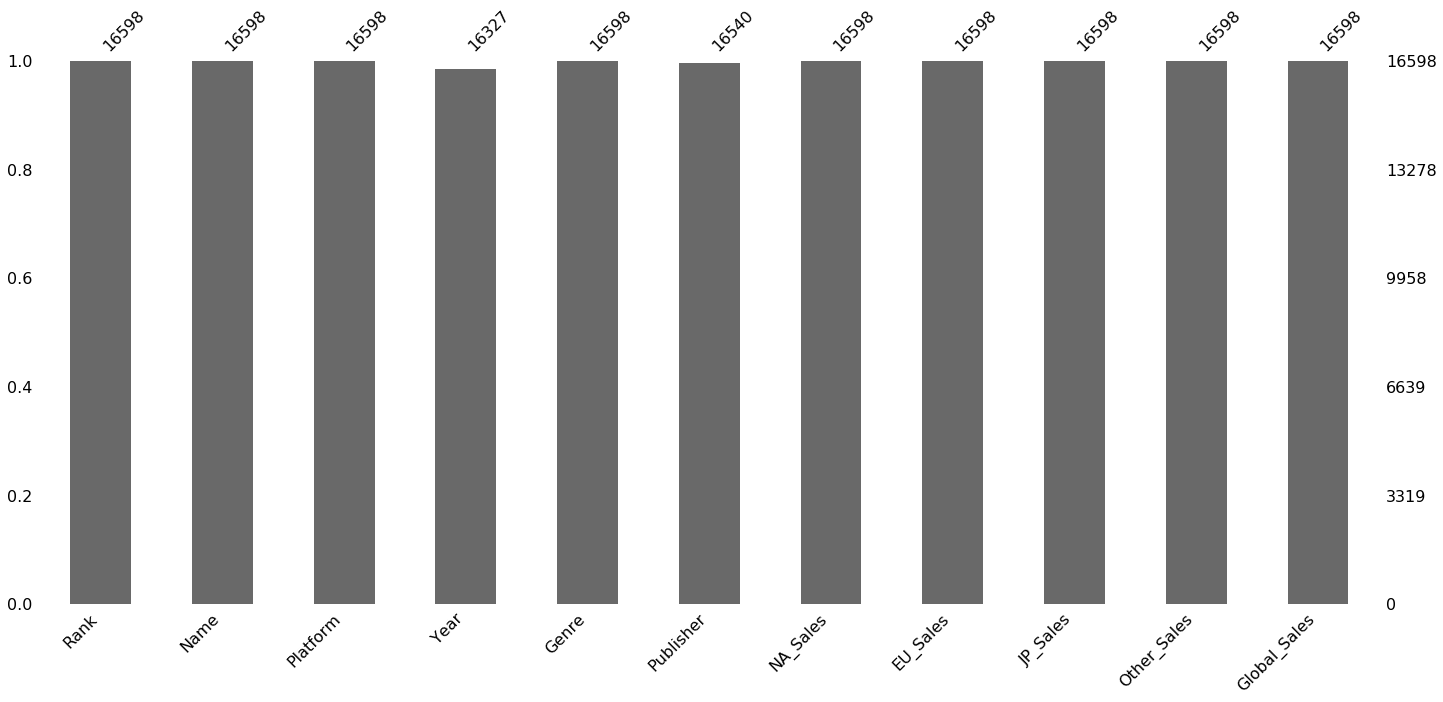

In [65]:
msno.bar(df)


In [66]:
df.columns[df.isnull().any()].tolist()

['Year', 'Publisher']

In [67]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [68]:
df.loc[[0]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [69]:
df.loc[30:33]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
32,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


In [70]:
df.drop([0,24,51], axis=0).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [71]:
df.drop(df.index[1:5], axis=0).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72


In [72]:
df[100:].head() 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
102,103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.51,3.03,0.00,0.73,7.27
103,104,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23
104,105,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20


In [75]:
df.EU_Sales.values

array([2.902e+01, 3.580e+00, 1.288e+01, ..., 0.000e+00, 1.000e-02,
       0.000e+00])

In [76]:
df['EU_Sales'].values

array([2.902e+01, 3.580e+00, 1.288e+01, ..., 0.000e+00, 1.000e-02,
       0.000e+00])

In [77]:
df.EU_Sales.unique()

array([2.902e+01, 3.580e+00, 1.288e+01, 1.101e+01, 8.890e+00, 2.260e+00,
       9.230e+00, 9.200e+00, 7.060e+00, 6.300e-01, 1.100e+01, 7.570e+00,
       6.180e+00, 8.030e+00, 8.590e+00, 4.940e+00, 9.270e+00, 4.000e-01,
       3.750e+00, 9.260e+00, 4.520e+00, 2.710e+00, 3.440e+00, 5.310e+00,
       5.490e+00, 3.900e+00, 3.280e+00, 5.360e+00, 5.090e+00, 4.280e+00,
       5.040e+00, 3.730e+00, 4.050e+00, 5.810e+00, 5.880e+00, 4.300e+00,
       3.630e+00, 5.820e+00, 4.510e+00, 2.610e+00, 4.440e+00, 3.520e+00,
       3.910e+00, 2.830e+00, 2.770e+00, 2.850e+00, 1.000e-02, 3.400e+00,
       3.370e+00, 2.040e+00, 3.100e+00, 3.870e+00, 2.990e+00, 4.880e+00,
       3.690e+00, 3.760e+00, 2.150e+00, 2.650e+00, 3.110e+00, 3.150e+00,
       2.630e+00, 1.980e+00, 1.940e+00, 3.070e+00, 2.360e+00, 2.470e+00,
       2.890e+00, 3.420e+00, 2.380e+00, 1.710e+00, 2.320e+00, 1.880e+00,
       2.860e+00, 1.240e+00, 6.060e+00, 3.530e+00, 1.530e+00, 2.300e+00,
       1.860e+00, 5.050e+00, 6.420e+00, 2.010e+00, 

In [78]:
df.EU_Sales.value_counts()

0.00     5730
0.01     1496
0.02     1269
0.03      934
0.04      748
         ... 
2.39        1
1.23        1
8.03        1
6.21        1
11.00       1
Name: EU_Sales, Length: 305, dtype: int64

In [79]:
df.agg(['count', 'size', 'nunique'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598,16598,16598,16327,16598,16540,16598,16598,16598,16598,16598
size,16598,16598,16598,16598,16598,16598,16598,16598,16598,16598,16598
nunique,16598,11493,31,39,12,578,409,305,244,157,623


In [80]:
df.groupby('EU_Sales').agg(['count', 'size', 'nunique']).stack()

Rank  Name  Platform  Year  Genre  Publisher  NA_Sales  \
EU_Sales                                                                   
0.00     count    5730  5730      5730  5628   5730       5712      5730   
         size     5730  5730      5730  5730   5730       5730      5730   
         nunique  5730  5025        31    36     12        393       100   
0.01     count    1496  1496      1496  1468   1496       1491      1496   
         size     1496  1496      1496  1496   1496       1496      1496   
...                ...   ...       ...   ...    ...        ...       ...   
12.88    size        1     1         1     1      1          1         1   
         nunique     1     1         1     1      1          1         1   
29.02    count       1     1         1     1      1          1         1   
         size        1     1         1     1      1          1         1   
         nunique     1     1         1     1      1          1         1   

                  JP_Sales  Other_Sales  Global_Sales  
EU_Sales                                               
0.00     count        5730         5730          5730  
         size         5730         5730          5730  
         nunique       146           39           171  
0.01     count        1496         1496          1496  
         size         1496         1496          1496  
...                    ...          ...           ...  
12.88    size            1            1             1  
         nunique         1            1             1  
29.02    count           1            1             1  
         size            1            1             1  
         nunique         1            1             1  

[915 rows x 10 columns]

In [81]:
df.groupby('EU_Sales').agg(['count', 'size', 'nunique'])

Rank                Name               Platform                Year  \
         count  size nunique count  size nunique    count  size nunique count   
EU_Sales                                                                        
0.00      5730  5730    5730  5730  5730    5025     5730  5730      31  5628   
0.01      1496  1496    1496  1496  1496    1374     1496  1496      20  1468   
0.02      1269  1269    1269  1269  1269    1186     1269  1269      19  1251   
0.03       934   934     934   934   934     883      934   934      19   918   
0.04       748   748     748   748   748     718      748   748      18   740   
...        ...   ...     ...   ...   ...     ...      ...   ...     ...   ...   
9.27         1     1       1     1     1       1        1     1       1     1   
11.00        1     1       1     1     1       1        1     1       1     1   
11.01        1     1       1     1     1       1        1     1       1     1   
12.88        1     1       1     1     1       1        1     1       1     1   
29.02        1     1       1     1     1       1        1     1       1     1   

          ... NA_Sales JP_Sales               Other_Sales                \
          ...  nunique    count  size nunique       count  size nunique   
EU_Sales  ...                                                             
0.00      ...      100     5730  5730     146        5730  5730      39   
0.01      ...       70     1496  1496      31        1496  1496      23   
0.02      ...       82     1269  1269      38        1269  1269      23   
0.03      ...       80      934   934      37         934   934      24   
0.04      ...       87      748   748      40         748   748      22   
...       ...      ...      ...   ...     ...         ...   ...     ...   
9.27      ...        1        1     1       1           1     1       1   
11.00     ...        1        1     1       1           1     1       1   
11.01     ...        1        1     1       1           1     1       1   
12.88     ...        1        1     1       1           1     1       1   
29.02     ...        1        1     1       1           1     1       1   

         Global_Sales                
                count  size nunique  
EU_Sales                             
0.00             5730  5730     171  
0.01             1496  1496      83  
0.02             1269  1269      95  
0.03              934   934      99  
0.04              748   748     104  
...               ...   ...     ...  
9.27                1     1       1  
11.00               1     1       1  
11.01               1     1       1  
12.88               1     1       1  
29.02               1     1       1  

[305 rows x 30 columns]

In [82]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4234,4236,Razor Freestyle Scooter,PS,1999.0,Sports,Ubisoft,0.26,0.17,0.00,0.03,0.46
7119,7121,AC/DC LIVE: Rock Band Track Pack,X360,2008.0,Misc,MTV Games,0.21,0.00,0.00,0.02,0.23
106,107,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13
5242,5244,Company of Heroes 2,PC,2013.0,Strategy,THQ,0.06,0.25,0.00,0.05,0.36
13547,13549,Advance Guardian Heroes,GBA,2004.0,Role-Playing,Ubisoft,0.03,0.01,0.00,0.00,0.04


In [83]:
df.shape

(16598, 11)

In [84]:
df_sample.shape

(830, 11)

In [86]:
df_dropped = df.dropna(subset=['Publisher'])
df_dropped.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [87]:
df_dropped.shape

(16540, 11)

In [88]:
df_copy = df.copy()
df_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [89]:
df_copy.shape

(16598, 11)

In [91]:
df_dropped['NA_Sales'].dtype

dtype('float64')

In [92]:
df_dropped['NA_Sales'].mean() 

0.2650792019347233

In [94]:
df_copy['NA_Sales'].fillna(value=np.round(df['NA_Sales'].mean(),decimals=0), inplace=True)

In [42]:
df_copy.agg(['count', 'size', 'nunique'])

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
count,1719,1719,1257,1719,1719,1719,1719,1719
size,1719,1719,1719,1719,1719,1719,1719,1719
nunique,1719,27,61,34,520,397,38,175


In [95]:
list(df['Name'].unique())

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Wii Fit Plus',
 'Kinect Adventures!',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Pokemon Black/Pokemon White',
 'Brain Age 2: More Training in Minutes a Day',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Animal Crossing: Wil

In [96]:
keys = list(df['Name'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Wii Sports': 1,
 'Super Mario Bros.': 2,
 'Mario Kart Wii': 3,
 'Wii Sports Resort': 4,
 'Pokemon Red/Pokemon Blue': 5,
 'Tetris': 6,
 'New Super Mario Bros.': 7}

In [97]:
df['Name'].map(act)
df_copy.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [98]:
df_copy['NA_Sales'].mean()

0.26466742981084057

In [99]:
df_copy['NA_Sales'][df_copy['Name'] == 6]

Series([], Name: NA_Sales, dtype: float64)

In [100]:
df_copy.groupby(["Name", "Global_Sales", "Publisher"]).count()

,,,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,Global_Sales,Publisher,,,,,,,,
'98 Koshien,0.41,Magical Company,1,1,1,1,1,1,1,1
.hack//G.U. Vol.1//Rebirth,0.17,Namco Bandai Games,1,1,1,1,1,1,1,1
.hack//G.U. Vol.2//Reminisce,0.23,Namco Bandai Games,1,1,1,1,1,1,1,1
.hack//G.U. Vol.2//Reminisce (jp sales),0.16,Namco Bandai Games,1,1,1,1,1,1,1,1
.hack//G.U. Vol.3//Redemption,0.17,Namco Bandai Games,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,0.01,Mentor Interactive,1,1,1,1,1,1,1,1
uDraw Studio,2.46,THQ,1,1,1,1,1,1,1,1
uDraw Studio: Instant Artist,0.02,THQ,1,1,1,1,1,1,1,1


In [101]:
df_copy.Name

0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16593                  Woody Woodpecker in Crazy Castle 5
16594                       Men in Black II: Alien Escape
16595    SCORE International Baja 1000: The Official Game
16596                                          Know How 2
16597                                    Spirits & Spells
Name: Name, Length: 16598, dtype: object

In [102]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4234,4236,Razor Freestyle Scooter,PS,1999.0,Sports,Ubisoft,0.26,0.17,0.00,0.03,0.46
7119,7121,AC/DC LIVE: Rock Band Track Pack,X360,2008.0,Misc,MTV Games,0.21,0.00,0.00,0.02,0.23
106,107,Crash Bandicoot 3: Warped,PS,1998.0,Platform,Sony Computer Entertainment,3.68,1.75,1.42,0.28,7.13
5242,5244,Company of Heroes 2,PC,2013.0,Strategy,THQ,0.06,0.25,0.00,0.05,0.36
13547,13549,Advance Guardian Heroes,GBA,2004.0,Role-Playing,Ubisoft,0.03,0.01,0.00,0.00,0.04


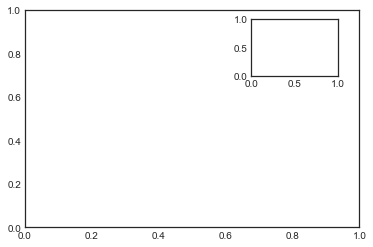

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

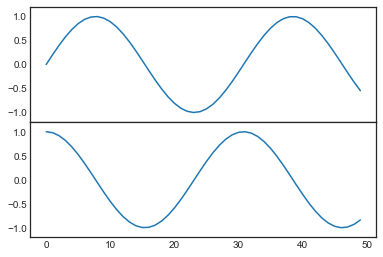

In [104]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

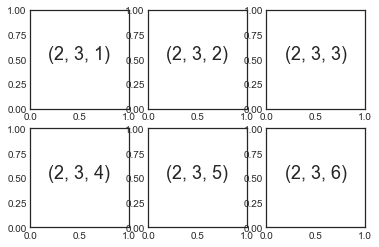

In [105]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

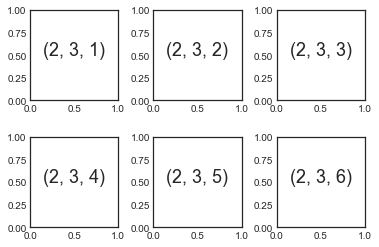

In [106]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

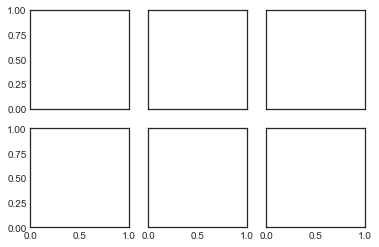

In [107]:

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

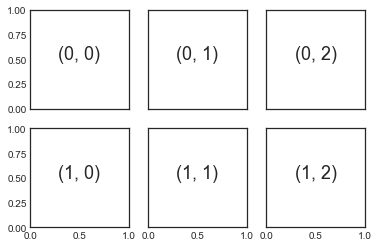

In [108]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

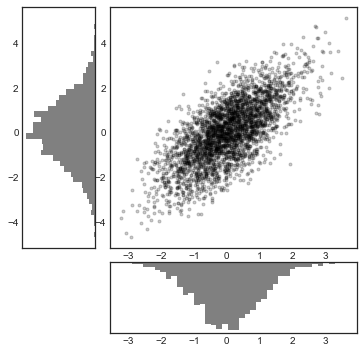

In [109]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

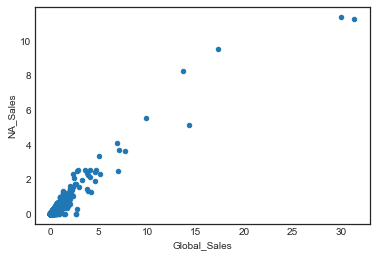

In [113]:
df_sample.plot(kind='scatter',x='Global_Sales',y='NA_Sales')

Text(0.5, 1.0, 'Frequency of NA_Sales')

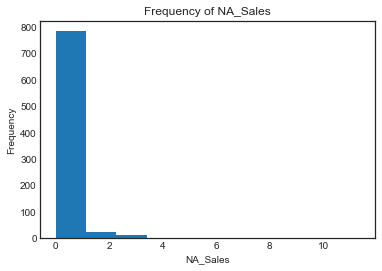

In [116]:
plt.hist(df_sample['NA_Sales'])
plt.xlabel('NA_Sales')
plt.ylabel('Frequency')
plt.title('Frequency of NA_Sales')

Text(0.5, 1.0, 'Frequency of Year')

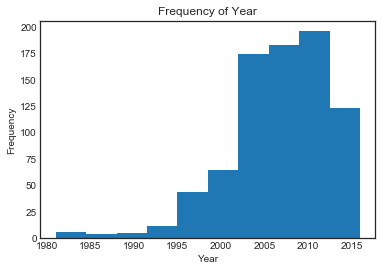

In [118]:
plt.hist(df_sample['Year'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Year')

Text(0.5, 1.0, 'Box Plot of global sales')

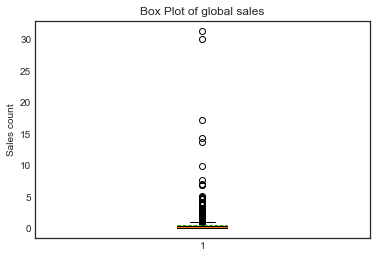

In [119]:
plt.boxplot(df_sample['Global_Sales'], showmeans=True, meanline=True)
plt.ylabel('Sales count')
plt.title('Box Plot of global sales')